# EDA Instacart Capstone Data Cleaning Through Exporting New Data Set
#### This Notebook goes throug an initial cleaning and exploration of the 2017 instacart data set 
#### It ends with exporting a new data frame to use in creating a TF-IDF Model

1. Importing basics  //   
Starts at : [1] 

2. Importing Data Sets  //  
Starts at : [2] 

3. Checking and Printing Basic Info on Each Data Frame  //   
Starts at : [3]

4. Addressing Nulls  //  
Starts at : [23]

5. Looking at Basic Statistics on Orders Data  //  
Starts at : [28]

6. Users split in to Quarters  //  
Starts at : [34]

6. Merging Data Sets to be Workable  // 
Starts at : [44]

7. Setting Up Natural Language Processing // 
Starts at : [51]

8. Finalizing Data Set to Bring in to TF-IDF // 
Starts at : [58]


## Importing the basics


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Instacart Data Sets

In [2]:
# Read in aisles
aisles_path = 'aisles.csv'
aisles = pd.read_csv(aisles_path)

# Read in departments
departments_path = 'departments.csv'
departments = pd.read_csv(departments_path)

# Read in orders
orders_path = 'orders.csv'
orders = pd.read_csv(orders_path)

# Read in products
prod_path = 'products.csv'
products = pd.read_csv(prod_path)

# Read in order_products__prior.csv
ord_prod_path = 'order_products__prior.csv'
order_products = pd.read_csv(ord_prod_path)


### Checking and Printing Basic Info on Each Data Frame
Here I want to just find out about the data, see how many rows and columns there are. Print out part of each of the sets to see how the work and check for any null values I need to investigate

#### Aisles

In [3]:
#Finding the number of rows and columns in the data frame
aisles_rows = aisles.shape[0]
aisles_columns = aisles.shape[1]

print('row number = ' + str(aisles_rows))
print('column number = ' + str(aisles_columns))

row number = 134
column number = 2


In [4]:
null_aisles = aisles.isnull().sum() 
print(null_aisles)

aisle_id    0
aisle       0
dtype: int64


In [5]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
aisles.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


#### Departments

In [7]:
#Finding the number of rows and columns in the data frame
departments_rows = departments.shape[0]
departments_columns = departments.shape[1]

print('row number = ' + str(departments_rows))
print('column number = ' + str(departments_columns))

row number = 21
column number = 2


In [8]:
null_departments = departments.isnull().sum() 
print(null_departments)

department_id    0
department       0
dtype: int64


In [9]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [10]:
departments.head(21)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


#### Orders

In [11]:
#Finding the number of rows and columns in the data frame
orders_rows = orders.shape[0]
orders_columns = orders.shape[1]

print('row number = ' + str(orders_rows))
print('column number = ' + str(orders_columns))

row number = 3421083
column number = 7


In [12]:
null_orders = orders.isnull().sum() 
print(null_orders)

#of the 3421083 orders 206209 are nulls
#So I want to look at this in another section addressing nulls 

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [14]:
#I wanted to see if there were reoccurring orders by a user
#so I sorted it by user id and printed the first 50 rows
#looks like there are reoccuring orders

orders_by_id = orders.sort_values(by='order_id', ascending=True)
orders_by_id.head(50)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0
370620,6,22352,prior,4,1,12,30.0
2374153,7,142903,prior,11,2,14,30.0
50028,8,3107,prior,5,4,6,17.0
2308534,9,139016,prior,14,0,19,5.0
2249060,10,135442,prior,4,6,8,8.0


#### Products

In [15]:
#Finding the number of rows and columns in the data frame
products_rows = products.shape[0]
products_columns = products.shape[1]

print('row number = ' + str(products_rows))
print('column number = ' + str(products_columns))

row number = 49688
column number = 4


In [16]:
null_products = products.isnull().sum() 
print(null_products)

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


#### Order Products

In [19]:
#Finding the number of rows and columns in the data frame
order_prod_rows = order_products.shape[0]
order_prod_columns = order_products.shape[1]

print('row number = ' + str(order_prod_rows))
print('column number = ' + str(order_prod_columns))

row number = 32434489
column number = 4


In [20]:
null_order_products = order_products.isnull().sum() 
print(null_order_products)

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [21]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [22]:
#I wanted to see if there were reoccurring orders by a user
#so I sorted it by user id and printed the first 50 rows
#looks like there are reoccuring orders

order_products_by_id = order_products.sort_values(by='order_id', ascending=True)


order_products_by_id.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
16,3,32665,8,1


## Addressing Nulls
One data set has nulls so I want to take a look at that and see if there is anything to address

In [23]:
#Here are the number of rows and columns for reference
orders_rows = orders.shape[0]
orders_columns = orders.shape[1]

print('row number = ' + str(orders_rows))
print('column number = ' + str(orders_columns))

row number = 3421083
column number = 7


In [24]:
#Here are the column names for reference

#We have 3,421,083 columns of data 

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [25]:
#here we see that the nulls are in  days since prior order

null_orders = orders.isnull().sum()

print(null_orders)

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


In [26]:
#I think the nulls are customers that have only placed one order on instacart.

orders_by_null = orders.sort_values(by='order_number', ascending=True)
orders_by_null.head(10)

#It looks like this checks out, the orders with NaN are also order #1.
#So there are no days since last order since there is no last order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
538944,1261102,32500,prior,1,4,16,NaN
538935,2724214,32499,prior,1,6,15,NaN
2502633,872877,150657,prior,1,5,10,NaN
2502658,2197007,150658,prior,1,2,17,NaN
2502662,3233433,150659,prior,1,5,14,NaN
2502669,1944543,150660,prior,1,0,12,NaN
2502674,440644,150661,prior,1,4,9,NaN
2502698,1543449,150662,prior,1,1,17,NaN
2502705,3330891,150663,prior,1,6,14,NaN


In [27]:
#So there are nulls. However I will not be using days_since_prior_order in my final data view. 
#I will be dropping the column
#In a more advanced model this column would be useful as it could factor in if the user had ordered
#a particular item recently. But I just want a proof of concept recommendation engine as I am new to NLP 

## Looking at Basic Statistics on Orders Data
To get a better idea of the orders data I want to pull some quick statitstics on it. This will give me a better idea of how I want to break up the data and work with it

### How many repeat users do we have? 

In [28]:
#I'm interested in if instacart has repeat customers
#to find out I am going to grab the value counts of user_id 
#If their value count is above 1, they've ordered from instacart more than once 


repeat_users = orders['user_id'].value_counts()
print(repeat_users)

#It looks like we have 20,6209 unique users in our data set
#The highest number of repeat orders is 100 and the lowest is 4 repeat orders

152340    100
185641    100
185524    100
81678     100
70922     100
         ... 
13046       4
70208       4
111440      4
31762       4
47980       4
Name: user_id, Length: 206209, dtype: int64


In [29]:
#I'm going to grab some basic stats on the repeat users to see what that data looks like

repeat_users.describe()

count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: user_id, dtype: float64

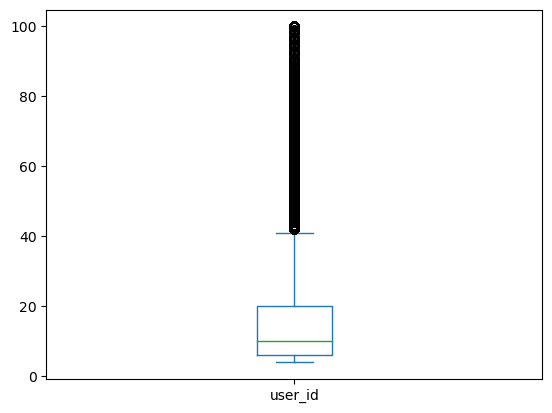

In [30]:
#To see how that data is distributed I'm going to show it in a box plot

repeat_users.plot(kind='box');

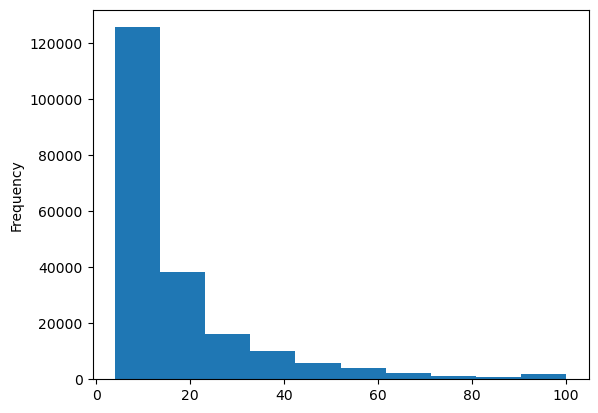

In [31]:
#and as a histogram since that distribution is the easiest for me to visualize
#it looks like most of our users are in the 0-25 orders range

repeat_users.plot(kind='hist', bins=10);

### Users split in to Quarters
Since we have a max of 100 I'm going to look closer at the distribution of data by chunks of 25

In [32]:
#Since the data set caps out at 100, I want to make historgams for 0-25 , 26 - 50, 51 - 75, 76 - 100
#This will help me zoom in a bit on how those users are distributed

user_order_counts_25 = repeat_users[repeat_users <= 25]

user_order_counts_50 = repeat_users[(repeat_users >= 26) & (repeat_users <= 50)]

user_order_counts_75 = repeat_users[(repeat_users >= 51) & (repeat_users <= 75)]

user_order_counts_100 = repeat_users[(repeat_users >= 76) & (repeat_users <= 100)]

In [33]:
user_order_counts_25.describe()

count    168184.000000
mean         10.120029
std           5.684367
min           4.000000
25%           5.000000
50%           8.000000
75%          14.000000
max          25.000000
Name: user_id, dtype: float64

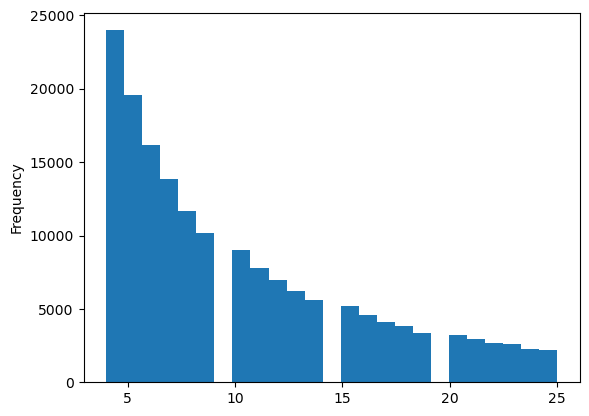

In [34]:
user_order_counts_25.plot(kind='hist', bins=25);

#there are 168,184 users in the 0-25 category with arond 24,000 of them having ordered 3 times
#This drops off as you get closer to 25

#This is our largest bin of users

In [35]:
user_order_counts_50.describe()

count    27115.000000
mean        35.282537
std          7.018349
min         26.000000
25%         29.000000
50%         34.000000
75%         41.000000
max         50.000000
Name: user_id, dtype: float64

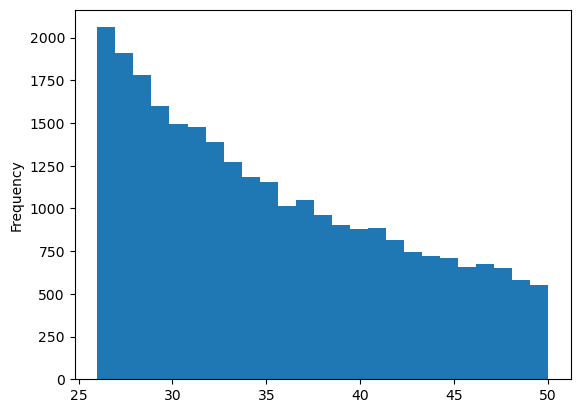

In [36]:
user_order_counts_50.plot(kind='hist', bins=25);

#there are 27,115 users in 26 - 50
#this data follws a less intense but similar shape to 0-25 with 27 occuring the most often and it dropping off

In [37]:
user_order_counts_75.describe()

count    7457.000000
mean       59.982835
std         6.929460
min        51.000000
25%        54.000000
50%        59.000000
75%        65.000000
max        75.000000
Name: user_id, dtype: float64

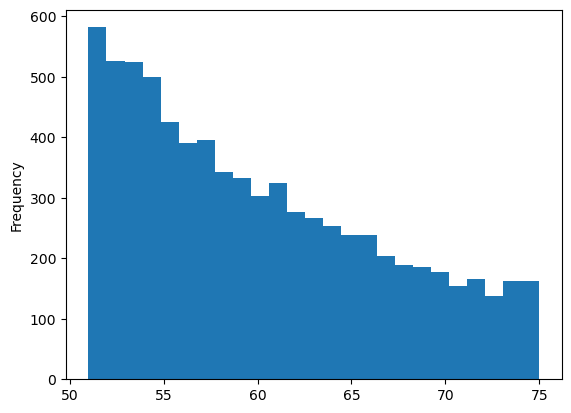

In [38]:
user_order_counts_75.plot(kind='hist', bins=25);
#51 - 75 also follows a similar pattern 

In [39]:
user_order_counts_100.describe()

# There are 3,615 users that have ordered between 76 & 100 times

count    3453.000000
mean       91.247611
std         8.820360
min        76.000000
25%        83.000000
50%        93.000000
75%       100.000000
max       100.000000
Name: user_id, dtype: float64

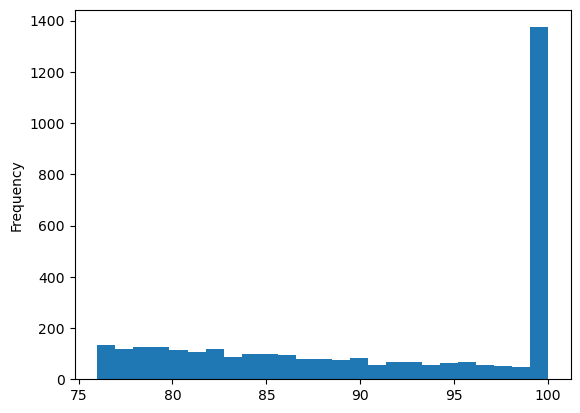

In [40]:
user_order_counts_100.plot(kind='hist', bins=25);

In [41]:
# around 1400 of these users have ordered 100 times 
# this is the only distribution that doesn't follow the same kind of shape
#most of the users in this categroy have ordered 100 times

In [42]:
#Based on this, I would say instacart has a lot of people sign up and use it a few times
#maybe there is some novelty in using instacart and then it drops off and you start losing people

# but when instacart gets a loyal customer they're really loyal. 
# so how could you keep the novelty of instacart alive? 

## Merging Data Sets to be Workable
Since I want to make a reccomendation engine, I'll have to merge the user ID's with what products they are actually buying. Right now I just have the product ID which isn't super readable for me

I'll also want to be able to see how many times a user ordered a specific product. My goal is to have a data set that shows the user, what items they've ordered, how many times they've ordered it, and the items overall popularity at the store

This will give me columns that are easier to weigh in natural language processing

In [43]:
#what are the most popular products overall? 

#how many times this product was in our data set 
#ex product 1 was in 1852 orders
#.reset_index = make it look like a data frame again
order_products_by_cat = order_products.groupby(by='product_id').order_id.count().reset_index().sort_values(by = 'order_id', ascending=False)

order_products_by_cat.head(10)

#we see that product 24852 is the most popular product with 472565 orders good for that product

,product_id,order_id
24848,24852,472565
13172,13176,379450
21133,21137,264683
21899,21903,241921
47198,47209,213584
47755,47766,176815
47615,47626,152657
16793,16797,142951
26204,26209,140627
27839,27845,137905


In [44]:
# let's join this with names of products for readability
# keep my left most data set intact this keeps my order_products df intact

joined_popular_products = order_products_by_cat.merge(products, on='product_id', how ='left')

joined_popular_products.head(20)

#people on instacart are getting lots of fruits and veg

,product_id,order_id,product_name,aisle_id,department_id
0,24852,472565,Banana,24,4
1,13176,379450,Bag of Organic Bananas,24,4
2,21137,264683,Organic Strawberries,24,4
3,21903,241921,Organic Baby Spinach,123,4
4,47209,213584,Organic Hass Avocado,24,4
5,47766,176815,Organic Avocado,24,4
6,47626,152657,Large Lemon,24,4
7,16797,142951,Strawberries,24,4
8,26209,140627,Limes,24,4
9,27845,137905,Organic Whole Milk,84,16


In [45]:
#now lets group by user id, product id, count of times product ordered

#has order id, product id
user_product_counts = order_products_by_id.merge(orders, on='order_id', how='left').groupby(['user_id', 'product_id']).order_id.count().reset_index()

user_product_counts.head()

,user_id,product_id,order_id
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [46]:
#this joins the product information with who is buying it + how often they are buying it

joined_user_products = user_product_counts.merge(products, on='product_id', how ='left').sort_values(['user_id','order_id'], ascending =[True,False])

joined_user_products.head(20)

#here we see that user 1's most pouplar items are soda and beef jerky

,user_id,product_id,order_id,product_name,aisle_id,department_id
0,1,196,10,Soda,77,7
3,1,12427,10,Original Beef Jerky,23,19
1,1,10258,9,Pistachios,117,19
8,1,25133,8,Organic String Cheese,21,16
4,1,13032,3,Cinnamon Toast Crunch,121,14
16,1,46149,3,Zero Calorie Cola,77,7
5,1,13176,2,Bag of Organic Bananas,24,4
9,1,26088,2,Aged White Cheddar Popcorn,23,19
10,1,26405,2,XL Pick-A-Size Paper Towel Rolls,54,17
17,1,49235,2,Organic Half & Half,53,16


In [47]:
#taking user 1, lets see how popular their top product is among all users
overall_prod_popularity = joined_user_products.merge(joined_popular_products, on='product_id', how='left')


#renaming some columns to make it easier to read. User count = how many times that user has ordered 
#overall popularity is how many times that item has been in an order overall 
#product name x is renamed to just product name since there were duplicates when we mergeed the data

overall_prod_popularity.rename(columns = {'order_id_x' : 'user_count', 'order_id_y' : 'overall_popularity', 'product_name_x' : 'product_name' }, inplace=True)

#now we just keep the data that we want
overall_prod_popularity = overall_prod_popularity[['user_id','product_id','user_count', 'product_name', 'overall_popularity']]


overall_prod_popularity.head(20)

#Here we see that user 1 has ordered soda 10 times and overall soda is pretty popular with 35791 orders 

,user_id,product_id,user_count,product_name,overall_popularity
0,1,196,10,Soda,35791
1,1,12427,10,Original Beef Jerky,6476
2,1,10258,9,Pistachios,1946
3,1,25133,8,Organic String Cheese,6196
4,1,13032,3,Cinnamon Toast Crunch,3751
5,1,46149,3,Zero Calorie Cola,8558
6,1,13176,2,Bag of Organic Bananas,379450
7,1,26088,2,Aged White Cheddar Popcorn,2523
8,1,26405,2,XL Pick-A-Size Paper Towel Rolls,1214
9,1,49235,2,Organic Half & Half,76360


In [48]:
# for each user and current cart status, grab all products they've ever ordered
# filter out what's already in their cart
# grab the top five items they have ordered (sort user_count and overall_popularity) to recommend for their "frequently purchased" recommendations

## Setting Up Natural Language Processing
I know I'll need to create tokens for the product names so we can count how many times a word comes up in a users order

In [49]:
# start with installing a few extra NLP things

#!pip install textblob

import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
#this simplifies the counts


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline

In [50]:
#Since we only just introduced NLP I'm going to try and go through it with just user 1 in the data set


# Read yelp.csv into a DataFrame.
print (overall_prod_popularity.shape)
#loading the data to read


# Create a new DataFrame that only contains the 5-star and 1-star reviews.
user_1 = overall_prod_popularity[(overall_prod_popularity.user_id==1)]
print (user_1.shape)
#I am filtering my data by just user 1 to keep things simple

# Define X and y.
X = user_1['product_name']
y = user_1['overall_popularity']
#so there really isn't anything I'm trying to predict yet. I just want the counts of words
#I put overall_popularity as a y for now

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#here we see that user 1 has 18 different items they've ordered from instacart

(13307953, 5)
(18, 5)


In [51]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
#create instance of vectorizor

X_train_dtm = vect.fit_transform(X_train)
#fit and then transform X train. Fitting on the X train data set. 
#Transform (create the matrix w/ freq counts)

X_test_dtm = vect.transform(X_test)
#I just want to transform X_test because I've already leaned it

In [52]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
X_train_dtm.shape

(13, 36)

In [53]:
print((vect.get_feature_names_out()[:50]))

#here we see our user 1 words are tokenized

['aged' 'almond' 'almonds' 'apples' 'bartlett' 'beef' 'calorie' 'cheddar'
 'chocolate' 'cinnamon' 'cola' 'crunch' 'fuji' 'greek' 'half' 'honeycrisp'
 'jerky' 'milk' 'organic' 'original' 'paper' 'pears' 'pick' 'popcorn'
 'rolls' 'size' 'soda' 'strained' 'toast' 'towel' 'unsweetened' 'vanilla'
 'white' 'xl' 'yogurt' 'zero']


In [54]:
#adding lowercase_false keeps case sensitivity out of the product count

vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)

In [55]:
 vect.get_feature_names_out()[-10:]

array(['Soda', 'Strained', 'Toast', 'Towel', 'Unsweetened', 'Vanilla',
       'White', 'XL', 'Yogurt', 'Zero'], dtype=object)

In [56]:
X_train.head()

7     Aged White Cheddar Popcorn
15      0% Greek Strained Yogurt
4          Cinnamon Toast Crunch
1            Original Beef Jerky
10           Organic Fuji Apples
Name: product_name, dtype: object

In [57]:
vect.vocabulary_

{'Aged': 0,
 'White': 32,
 'Cheddar': 7,
 'Popcorn': 23,
 'Greek': 13,
 'Strained': 27,
 'Yogurt': 34,
 'Cinnamon': 9,
 'Toast': 28,
 'Crunch': 11,
 'Original': 19,
 'Beef': 5,
 'Jerky': 16,
 'Organic': 18,
 'Fuji': 12,
 'Apples': 3,
 'Soda': 26,
 'Bartlett': 4,
 'Pears': 21,
 'Milk': 17,
 'Chocolate': 8,
 'Almonds': 2,
 'Half': 14,
 'XL': 33,
 'Pick': 22,
 'Size': 25,
 'Paper': 20,
 'Towel': 29,
 'Rolls': 24,
 'Honeycrisp': 15,
 'Unsweetened': 30,
 'Vanilla': 31,
 'Almond': 1,
 'Zero': 35,
 'Calorie': 6,
 'Cola': 10}

## Finalizing Data Set to Bring in to TF-IDF
Now that I've played around with the basics of NLP. I'm ready to export my final data set to use in my NLP model. To do this I'll need to make the users purchase history in to one document that TF-IDF can read and weigh

In [58]:
#first I need to multipy the product name by the number of times the user has ordered it.
#This will help the model place more importance on products the user frequently orders

overall_prod_popularity['repeated_product_name'] = (overall_prod_popularity['product_name'] + ',') * overall_prod_popularity['user_count']

overall_prod_popularity.head()

,user_id,product_id,user_count,product_name,overall_popularity,repeated_product_name
0,1,196,10,Soda,35791,"Soda,Soda,Soda,Soda,Soda,Soda,Soda,Soda,Soda,S..."
1,1,12427,10,Original Beef Jerky,6476,"Original Beef Jerky,Original Beef Jerky,Origin..."
2,1,10258,9,Pistachios,1946,"Pistachios,Pistachios,Pistachios,Pistachios,Pi..."
3,1,25133,8,Organic String Cheese,6196,"Organic String Cheese,Organic String Cheese,Or..."
4,1,13032,3,Cinnamon Toast Crunch,3751,"Cinnamon Toast Crunch,Cinnamon Toast Crunch,Ci..."


In [59]:
#Here I am grouping items purchased by the user. This will make each user just one row.
#product name will have everything they've ordered. 

grouped_orders = overall_prod_popularity.groupby('user_id')['repeated_product_name'].apply(lambda x: ','.join(x)).reset_index()

grouped_orders.head()

,user_id,repeated_product_name
0,1,"Soda,Soda,Soda,Soda,Soda,Soda,Soda,Soda,Soda,S..."
1,2,"Chipotle Beef & Pork Realstick,Chipotle Beef &..."
2,3,"Vanilla Unsweetened Almond Milk,Vanilla Unswee..."
3,4,"Enchilada Black Bean Vegetable,Enchilada Black..."
4,5,"Red Raspberries,Red Raspberries,Red Raspberrie..."


In [60]:
#This is a version of that grouping that does not factor in how many times the user has ordered an item. 
# I was just kind of curious to have both options


grouped_orders_opt_2 = overall_prod_popularity.groupby('user_id')['product_name'].apply(lambda x: ','.join(x)).reset_index()

grouped_orders_opt_2.head()

,user_id,product_name
0,1,"Soda,Original Beef Jerky,Pistachios,Organic St..."
1,2,"Chipotle Beef & Pork Realstick,Organic Hass Av..."
2,3,"Vanilla Unsweetened Almond Milk,Organic Avocad..."
3,4,"Enchilada Black Bean Vegetable,Vegetable Class..."
4,5,"Red Raspberries,Organic Blackberries,Plain Who..."


In [62]:
#saving out grouped orders to a new csv to use in NLP. See next notebook

grouped_orders.to_csv('output.csv', index=False)